<a href="https://colab.research.google.com/github/oganiler/google_colab/blob/main/ANN_MNIST_Handwritten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

#Load the data
minist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = minist.load_data()
#normalize the data [0-1]
x_train, x_test = x_train / 255.0, x_test/255.0
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

#Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train.shape: (60000, 28, 28)
y_train.shape: (60000,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [2]:
#Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8575 - loss: 0.4916 - val_accuracy: 0.9599 - val_loss: 0.1357
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9540 - loss: 0.1562 - val_accuracy: 0.9696 - val_loss: 0.1000
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9678 - loss: 0.1084 - val_accuracy: 0.9731 - val_loss: 0.0872
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9724 - loss: 0.0907 - val_accuracy: 0.9772 - val_loss: 0.0740
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9774 - loss: 0.0725 - val_accuracy: 0.9784 - val_loss: 0.0726
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9809 - loss: 0.0619 - val_accuracy: 0.9796 - val_loss: 0.0719
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9814 - loss: 0.0583 - val_accuracy: 0.9791 - val_loss: 0.0717
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9827 - loss: 0.0525 

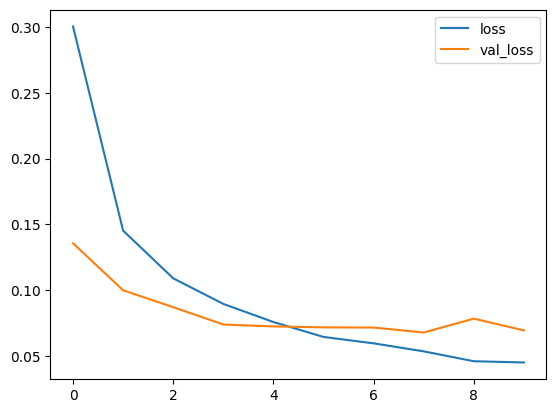

In [3]:
#plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

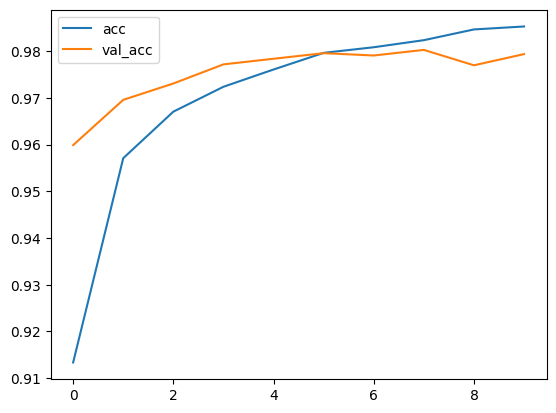

In [4]:
#Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [5]:
#Evaluate the model
print("Evaluate on test data")
results = model.evaluate(x_test, y  = y_test)
print("test loss, test acc:", results)

Evaluate on test data
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9757 - loss: 0.0854
test loss, test acc: [0.06956076622009277, 0.9793999791145325]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion matrix, without normalization
[[ 972    0    0    3    0    0    1    1    2    1]
 [   0 1123    3    1    0    0    2    0    6    0]
 [   7    1 1008    0    2    0    1    7    6    0]
 [   1    0    3  993    0    2    1    4    3    3]
 [   1    0    2    1  964    0    5    1    2    6]
 [   2    1    0    9    1  866    3    1    6    3]
 [   5    3    1    1    3    4  937    2    2    0]
 [   3    5   11    2    2    0    0  995    3    7]
 [   6    0    2    2    4    2    0    4  950    4]
 [   0    2    0    1   11    4    0    2    3  986]]


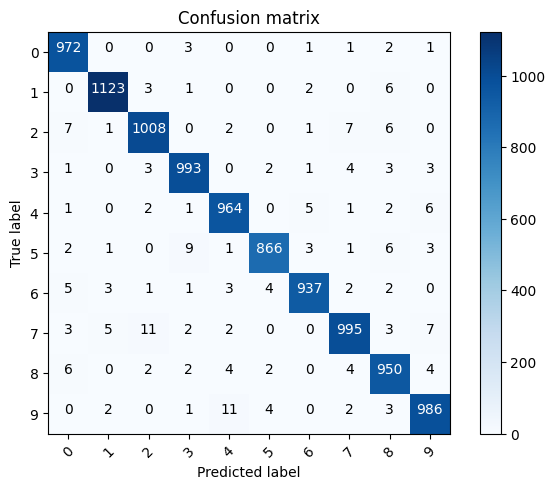

In [7]:
#Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


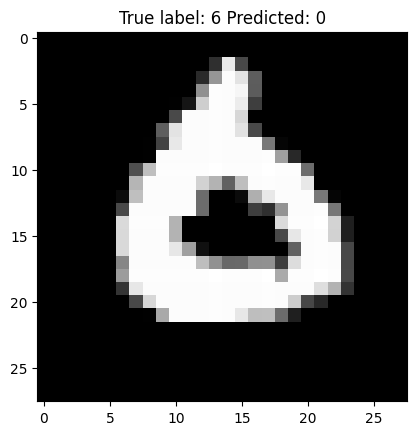

In [8]:
#show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));